## Lab 7 - Radio Astronomy

In [27]:
import numpy as np
import glob
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize']=(16,9)
plt.rc('font', family='serif')


In [15]:
# read in data from the SRT

# gather azimuth files
az_folder = '/Users/katie/Downloads/ASTRO361/Lab7/sun_azimuth/'
az_files = glob.glob(az_folder + "sun*") 
az_files.sort()

# gather elevation files
el_folder = '/Users/katie/Downloads/ASTRO361/Lab7/sun_elevation/'
el_files = glob.glob(el_folder + "sun*") 
el_files.sort()

In [18]:
# pull out relevant data (spectral data only) and put it into an array
# azimuth data

az_spectra = []
for az_file in az_files:
    with open(az_file) as az_data:
        
        az_spectrum_rows = []
        for j, row in enumerate(az_data, start=1): 
            if j%4 == 0: 
                az_spectrum_rows.append(row)
                
        az_tot_spectrum = np.zeros(1024) 
        for row in az_spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = [] 
            for val in temp_spec: 
                if val != '' and val != '\n': 
                    spec.append(val)     
                    
            az_tot_spectrum = az_tot_spectrum + np.float64(spec) 
            
        az_spectra.append(az_tot_spectrum)

In [19]:
# pull out relevant data (spectral data only) and put it into an array
# elevation data

el_spectra = []
for el_file in el_files:
    with open(el_file) as el_data:
        
        el_spectrum_rows = []
        for j, row in enumerate(el_data, start=1): 
            if j%4 == 0: 
                el_spectrum_rows.append(row)
                
        el_tot_spectrum = np.zeros(1024) 
        for row in el_spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = [] 
            for val in temp_spec: 
                if val != '' and val != '\n': 
                    spec.append(val)     
                    
            el_tot_spectrum = el_tot_spectrum + np.float64(spec) 
            
        el_spectra.append(el_tot_spectrum)

In [21]:
# create frequency arrays

freq = np.arange(1416,1426,0.009766)

In [22]:
# "crop" frequency array to eliminate outliers and large variations in data
freq = freq[75:700]

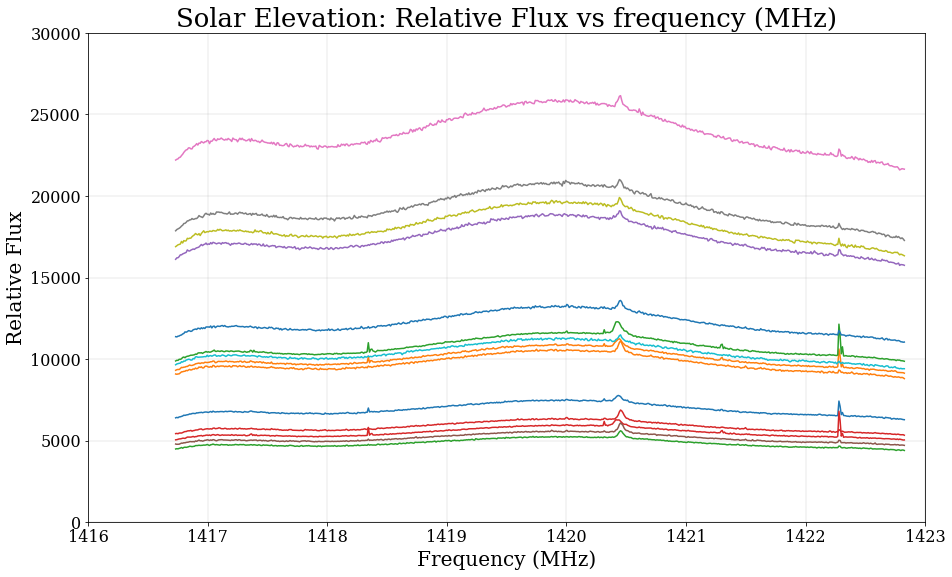

In [33]:
# plot one of our spectra (elevation) as frequency vs flux

plt.figure(figsize=(15,9)) 
for i in range (1,15):
    plt.plot(freq, el_spectra[i][75:700])
plt.xlim(1416,1423)
plt.xlabel('Frequency (MHz)',fontsize=20)
plt.ylabel('Relative Flux',fontsize=20)
plt.ylim(0,30000)
plt.tick_params(labelsize=16)
plt.title('Solar Elevation: Relative Flux vs frequency (MHz)',fontsize=26)
plt.grid(color='grey',linestyle='-', linewidth = 0.25, alpha = 0.65)

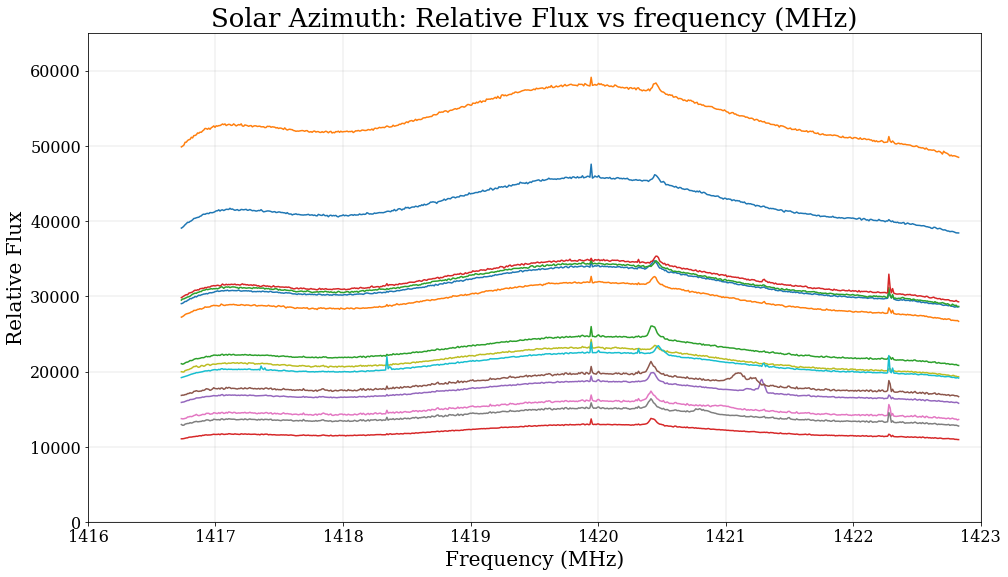

In [35]:
# plot our spectra (azimuth) as frequency vs flux

for i in range (1,15):
    plt.plot(freq, az_spectra[i][75:700])
plt.xlim(1416,1423)
plt.xlabel('Frequency (MHz)',fontsize=20)
plt.ylabel('Relative Flux',fontsize=20)
plt.ylim(0,65000)
plt.tick_params(labelsize=16)
plt.title('Solar Azimuth: Relative Flux vs frequency (MHz)',fontsize=26)
plt.grid(color='grey',linestyle='-', linewidth = 0.25, alpha = 0.65)

In [36]:
# average each scan into one value and create an array containing these averages
# for elevation and azimuth
el_avg = np.average(el_spectra,axis=1)
az_avg = np.average(az_spectra,axis=1)

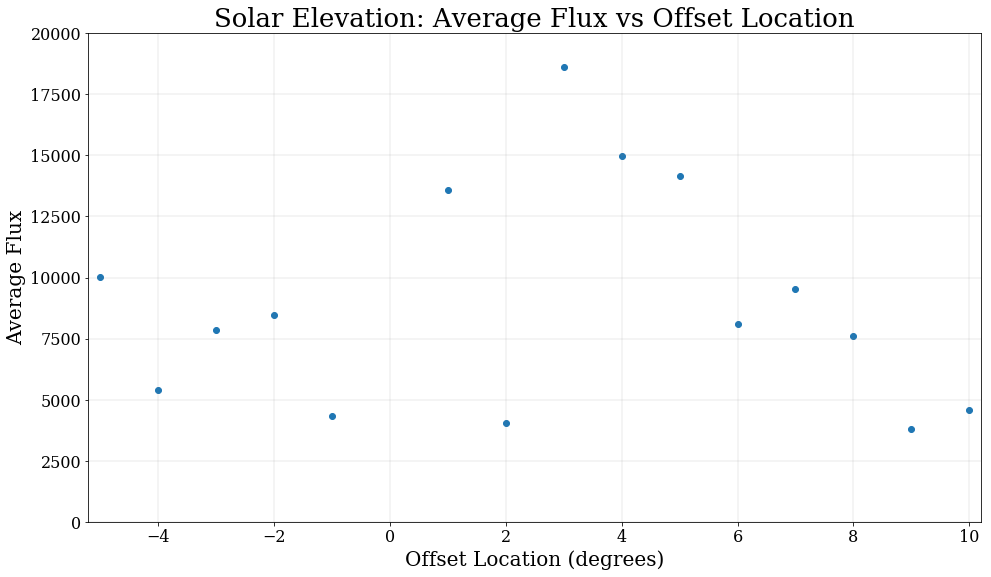

In [37]:
# plot offset position vs measured flux
# elevation

offsetE = [-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10]
plt.scatter(offsetE,el_avg)
plt.ylim(0,20000)
plt.xlabel('Offset Location (degrees)',fontsize=20)
plt.ylabel('Average Flux',fontsize=20)
plt.xlim(-5.2,10.2)
plt.tick_params(labelsize=16)
plt.title('Solar Elevation: Average Flux vs Offset Location',fontsize=26)
plt.grid(color='grey',linestyle='-', linewidth = 0.25, alpha = 0.65)

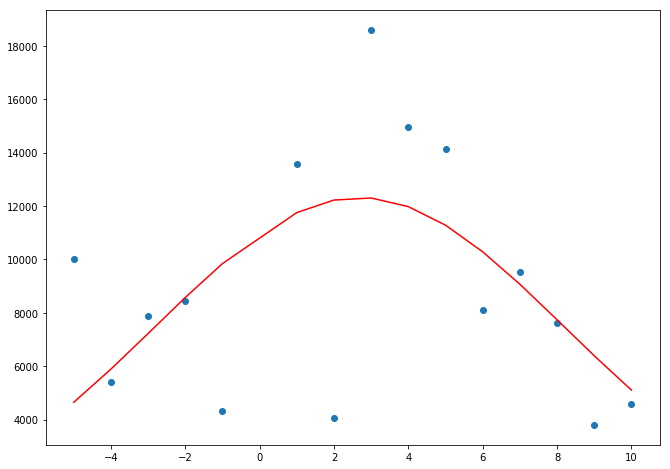

In [11]:
# apply curvefit to elevation data
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

guessE = [11,4,2]
coeffsE, fiterrE = curve_fit(gaus, offsetE, el_avg, p0=guessE)
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)
plt.scatter(offsetE,el_avg)
plt.ylim(0,20000)
plt.xlabel('Offset Location (degrees)',fontsize=20)
plt.ylabel('Average Flux',fontsize=20)
plt.xlim(-5.2,10.2)
plt.tick_params(labelsize=16)
plt.title('Solar Elevation: Average Flux vs Offset Location',fontsize=26)

plt.grid(color='grey',linestyle='-', linewidth = 0.25, alpha = 0.65)ax.plot(offsetE, gaus(offsetE, *coeffsE),color='r')

(-9.5, 10.5)

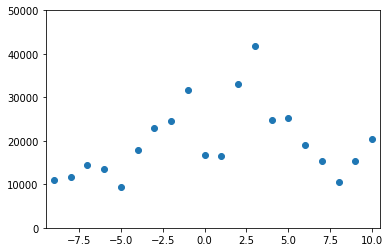

In [31]:
# plot offset position vs measured flux
# azimuth

offsetA = [-1,-2,-3,-4,-5,-6,-7,-8,-9,0,1,2,3,4,5,6,7,8,9,10]
plt.scatter(offsetA,az_avg)
plt.ylim(0,50000)
plt.xlim(-9.5,10.5)

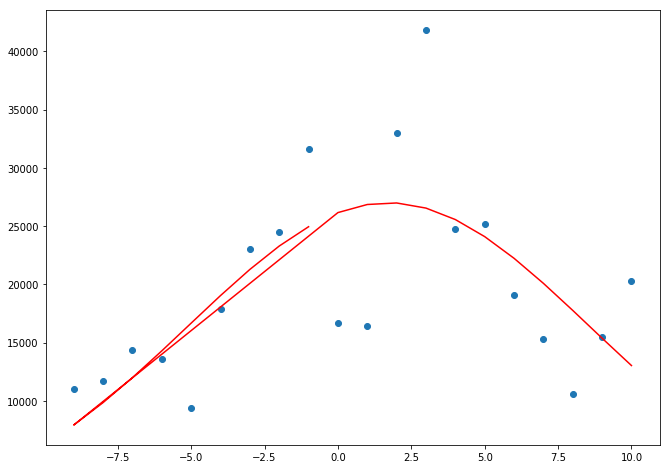

In [32]:
# apply curvefit to azimuth data

guessA = [35000,10,20]
coeffsA, fiterrA = curve_fit(gaus, offsetA, az_avg, p0=guessA)
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)
plt.scatter(offsetA,az_avg)
ax.plot(offsetA, gaus(offsetA, *coeffsA),color='r')